In [ ]:
import numpy as np

Convolucion con padding completo (es del largo del vector ventana - 1)

In [ ]:
np.convolve([0, 1, 0], [2, 3, 4])

array([0, 2, 3, 4, 0])

Convolucion con padding minimo (de forma que la secuencia resultante tenga el mismo largo que la original)

In [ ]:
np.convolve([0, 1, 0], [2, 3, 4],"same")

array([2, 3, 4])

Convolucion sin padding

In [ ]:
np.convolve([0, 1, 0], [2, 3, 4],"valid")

array([3])

Con eso, podemos por ejemplo detectar en que posiciones ocurre un cambio de un 0 a un 1 en una secuencia

In [ ]:
np.convolve([-1, 0, 1], [1, 0, 0,0,0,1],"valid")

array([ 1,  0,  0, -1])

In [ ]:
np.convolve([1, 0, -1], [1, 0, 0,0,0,1],"valid")

array([-1,  0,  0,  1])

En este caso, podemos detectar los cambios cuando el valor es distinto de 0. Pero en otros casos donde los numeros son siempre positivos, el valor negativo pasaria a ser un 0 y no lo detectariamos. Pero siempre tenemos alternativas ingeniosas para suplir estos casos.

In [ ]:
np.convolve([1, -2, 1], [1, 0, 0,0,0,1],"valid")

array([1, 0, 0, 1])

Si todos los valores suman 1 y estan distribuidos en forma de campana, podemos hacer una suerte de promedio movil

In [ ]:
np.convolve([0.05,0.2, 0.5, 0.2,0.05], [1, 0, 0,0,0,1],"same")

array([0.5 , 0.2 , 0.05, 0.05, 0.2 , 0.5 ])

In [ ]:
np.convolve([0.05,0.2, 0.5, 0.2,0.05], [0,1,1,1,5,5,5,9,9,9,9,9,9,5,5,5,1,1,1,0],"same")

array([0.25, 0.75, 1.15, 2.  , 4.  , 5.  , 6.  , 8.  , 8.8 , 9.  , 9.  ,
       8.8 , 8.  , 6.  , 5.  , 4.  , 2.  , 1.15, 0.75, 0.25])

Fijense que con esto hay una progresion mas suave entre los valores resultantes.


Y ahora lo que le gusta a todo el mundo, como funciona esto con imagenes

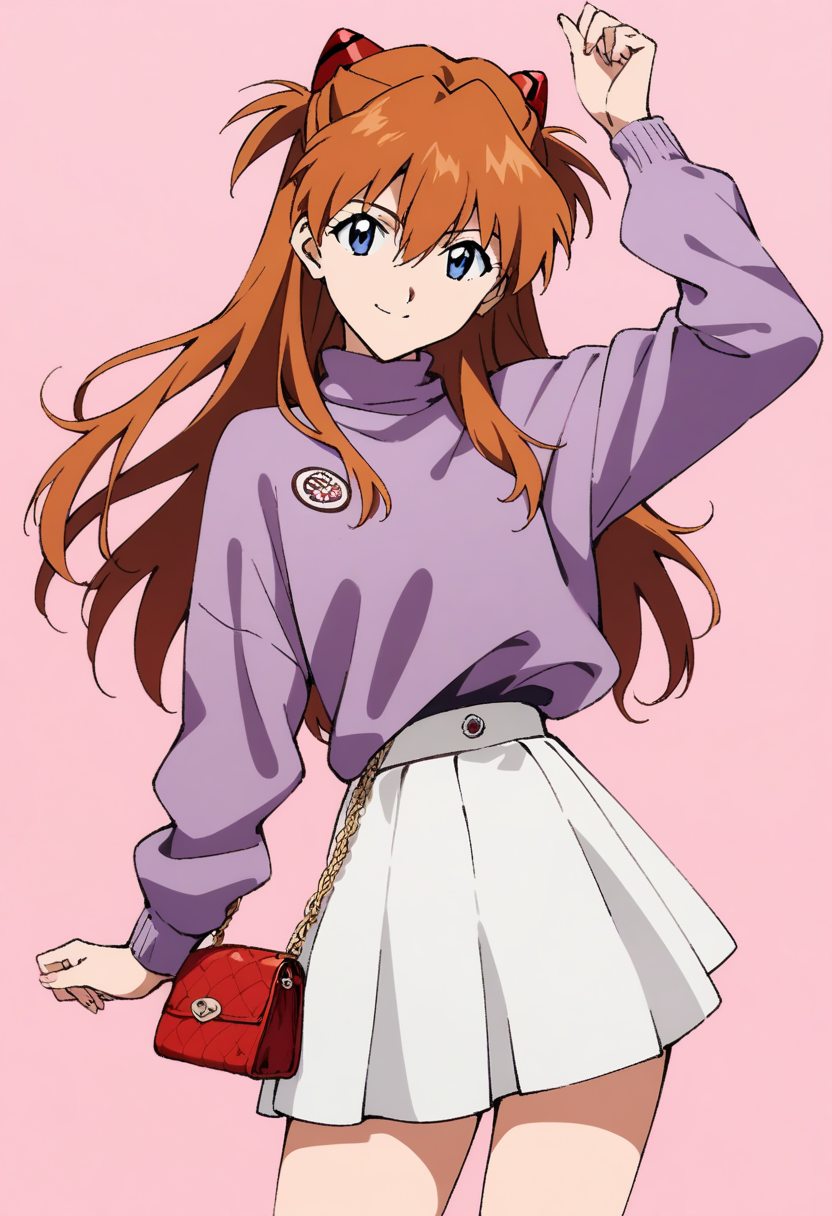

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/EJ1.png')
cv2_imshow(image)

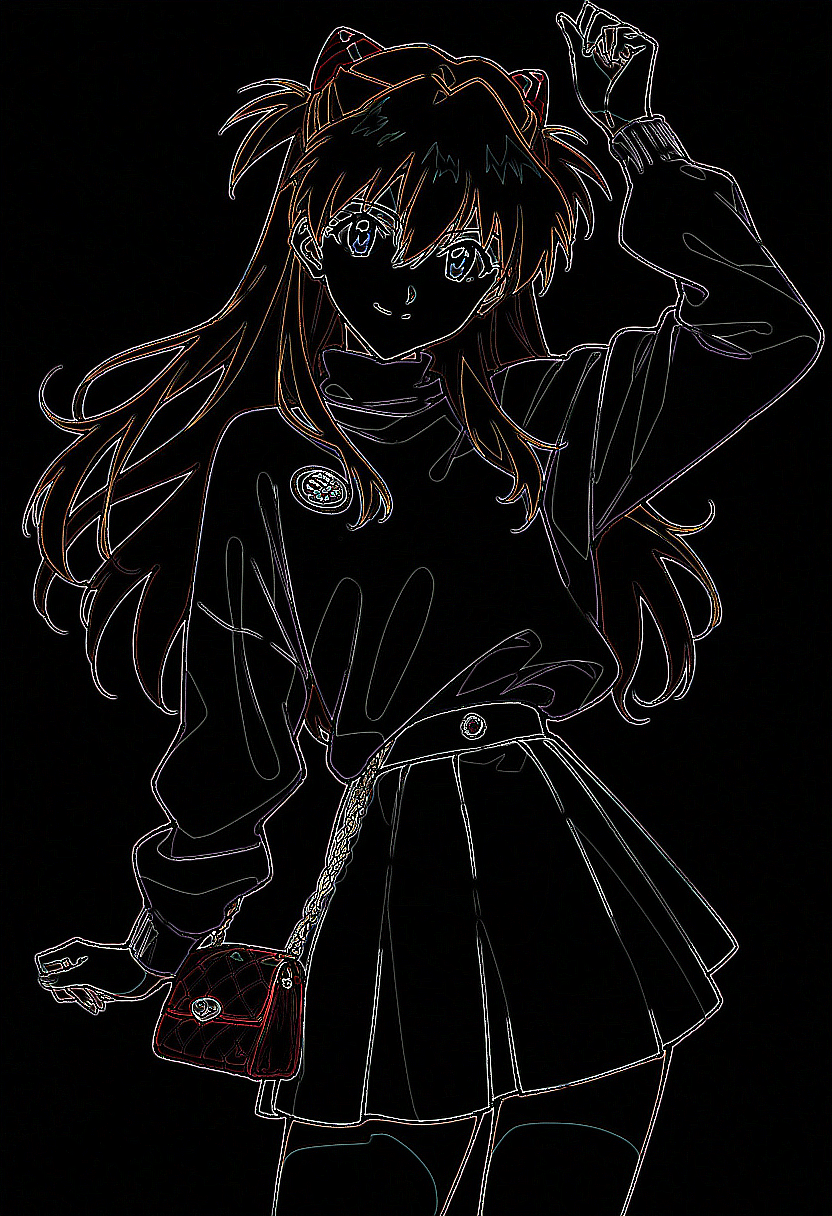

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

convolved_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(convolved_image)

In [ ]:
kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

convolved_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(convolved_image)

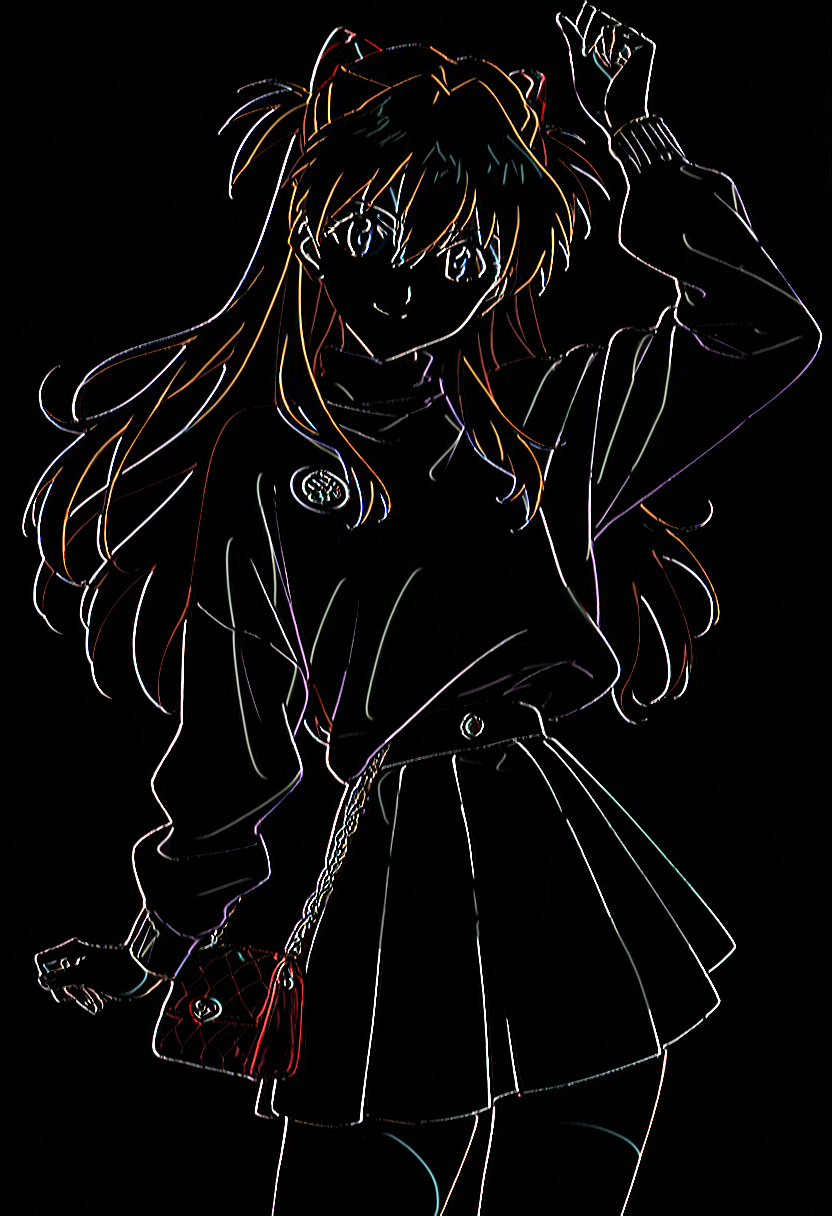

In [ ]:
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

convolved_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(convolved_image)

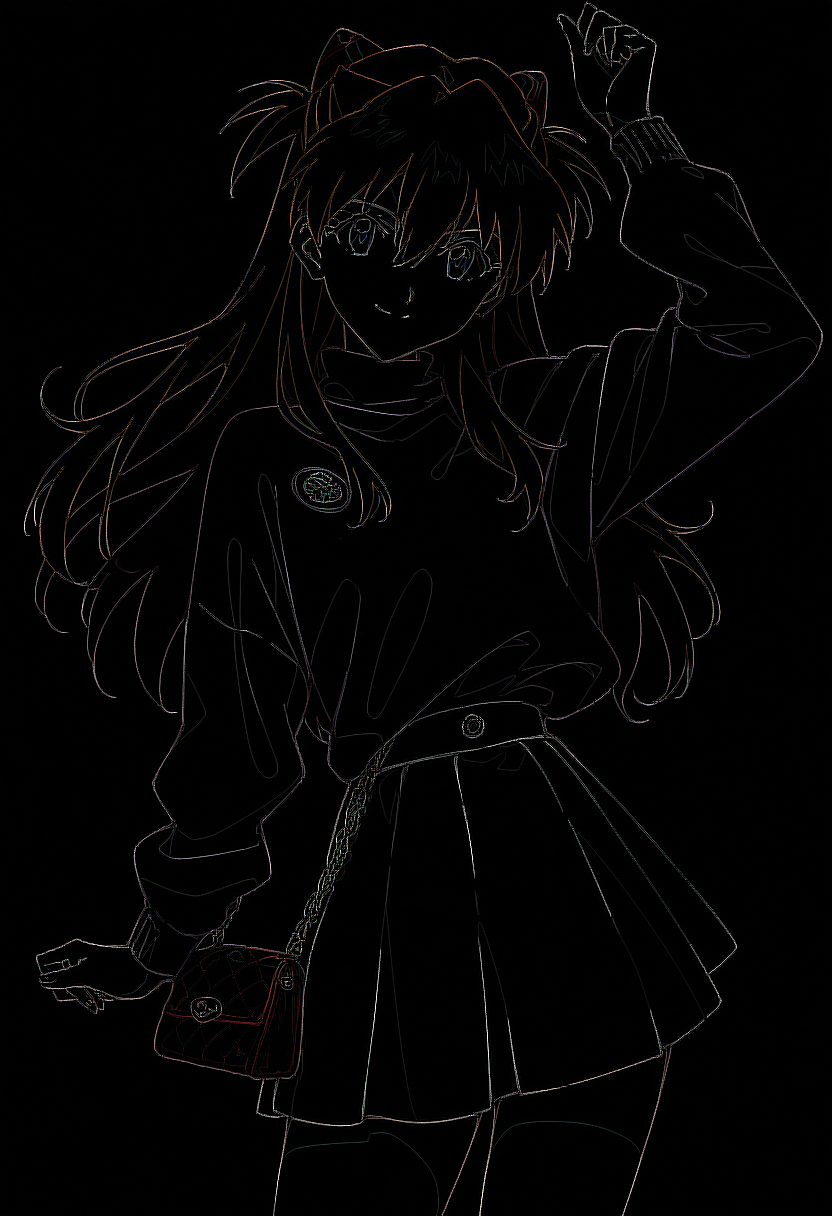

In [ ]:
kernel = np.array([[1, -1, 1],
                   [-1, 0, -1],
                   [1, -1, 1]])

convolved_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(convolved_image)

In [ ]:
kernel = np.array([[0, -1, -1],
                   [1, 0, -1],
                   [1, 1, 0]])

convolved_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(convolved_image)

In [ ]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

convolved_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(convolved_image)

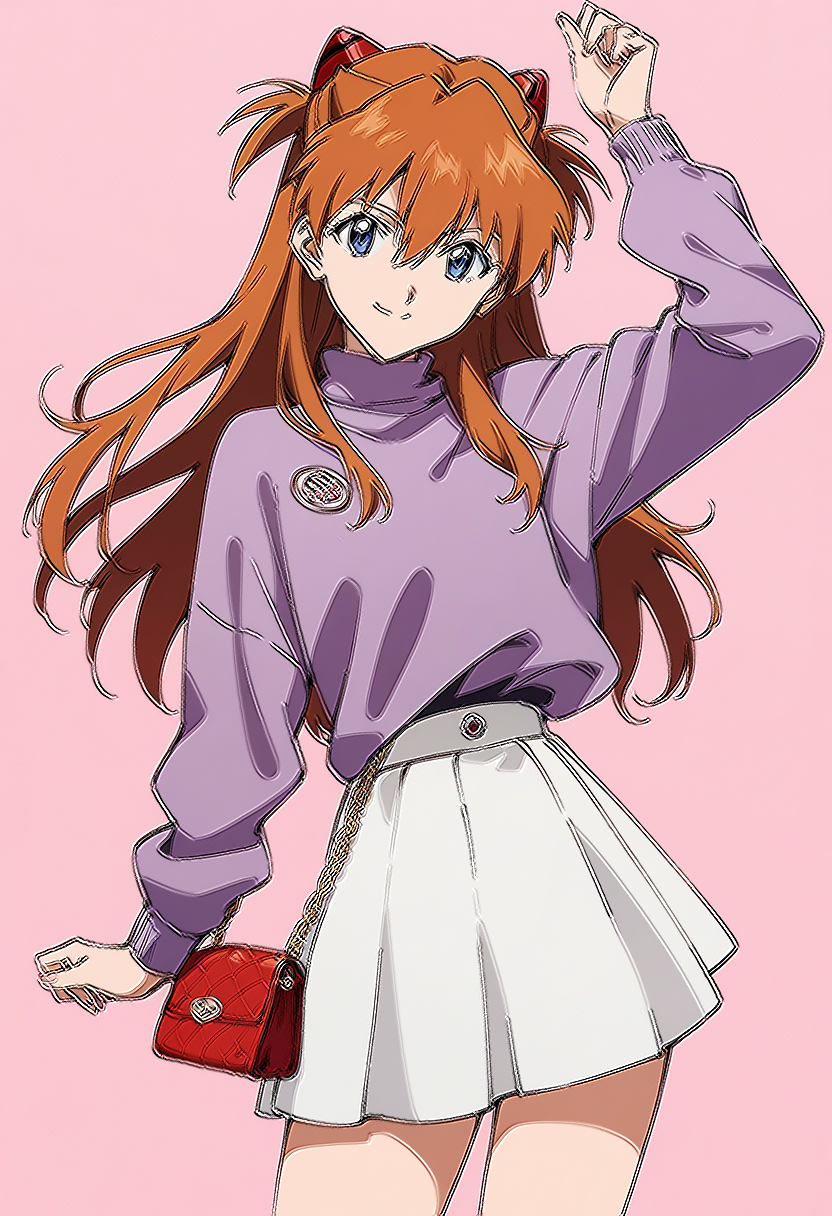

In [ ]:
kernel = np.array([[-1, 0, 1, 0, 0],
                   [0, 1, -1, 1, 0],
                   [1, -1, -1, -1, 1],
                   [0, 1, -1, 1, 0],
                   [0, 0, 1, 0, -1]])

convolved_image = cv2.filter2D(image, -1, kernel)
cv2_imshow(convolved_image)

In [ ]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

gaussian_kernel = gaussian_kernel(25, 5)

convolved_image = cv2.filter2D(image, -1, gaussian_kernel)
cv2_imshow(convolved_image)

In [ ]:
gaussian_kernel

In [ ]:
gaussian_kernel.shape

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

convolved_image = cv2.filter2D(convolved_image, -1, kernel)
cv2_imshow(convolved_image)